<a href="https://colab.research.google.com/github/nastaranmarzban/BGAT-and-GAT-Jupyter-notebook/blob/main/GAT_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!pip install pandas
import pandas as pd
import torch
import numpy as np

In [ ]:
#path = F"/gdrive/MyDrive/gene_6_prior/gene.pt"
path = F"/gdrive/MyDrive/gene_better/gene.pt"
Data = torch.load(path)
Data

{'x': tensor([[ 6.4493,  6.0844,  7.3716,  ...,  8.6918, 10.8691, 11.2004],
         [12.4170, 11.6782, 13.3738,  ...,  9.0700, 10.2089, 10.4571],
         [ 8.1833,  6.4246, 10.5602,  ...,  7.3575,  6.6114,  7.7576],
         ...,
         [ 6.6002,  7.4879,  8.0421,  ...,  9.6510,  8.9851,  9.4696],
         [ 6.6107,  7.4934,  8.0498,  ...,  9.6591,  8.9828,  9.4788],
         [ 6.6001,  7.4911,  8.0561,  ...,  9.6553,  8.9820,  9.4658]]),
 'edge_index': tensor([[ 0,  0,  0,  ..., 89, 89, 89],
         [ 8, 10, 57,  ..., 85, 86, 87]]),
 'y': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'train_mask': tensor([False, False, False, False,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True

In [ ]:
print(f'Number of nodes: {Data["x"].size(0)}')
print(f'Number of features: {Data["x"].size(1)}')
print(f'Number of classes: {torch.numel(torch.unique(Data["y"],sorted=True))}')
print(f'Number of edges: {Data["edge_index"].size(1)}')
print(f'Average node degree: {Data["edge_index"].size(1) / Data["x"].size(0):.2f}')
print(f'Number of training nodes: {Data["train_mask"].sum()}')
print(f'Number of testing nodes: {Data["test_mask"].sum()}')
print(f'Training node label rate: {int(Data["train_mask"].sum()) /  Data["x"].size(0):.2f}')

Number of nodes: 90
Number of features: 60
Number of classes: 3
Number of edges: 1650
Average node degree: 18.33
Number of training nodes: 78
Number of testing nodes: 6
Training node label rate: 0.87


In [ ]:
#path = F"/gdrive/MyDrive/gene_6_prior/p_links_gene.pt"

path = F"/gdrive/MyDrive/gene_better/p_links_gene.pt"
p_link = torch.load(path)
print(p_link.size())
print(p_link.dtype)
print(p_link.type())

torch.Size([90, 90])
torch.float32
torch.FloatTensor


In [ ]:
import os
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.1.0+cu118
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from torch_geometric.nn import MessagePassing
import torch_geometric.nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

In [ ]:
class Myconv(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(2)
        self.conv1 = GATConv(in_channels=60, out_channels = 45)
        self.conv2 =  GATConv(45, 15)
        self.conv3 =  GATConv(15,3)



    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.tanh(h)
        h = self.conv2(h, edge_index)
        h = F.tanh(h)
        h = self.conv3(h, edge_index)
        #h = F.log_softmax(h)
        return h


model = Myconv()
print(model)
print(model.forward(Data["x"], Data["edge_index"]))

Myconv(
  (conv1): GATConv(60, 45, heads=1)
  (conv2): GATConv(45, 15, heads=1)
  (conv3): GATConv(15, 3, heads=1)
)
tensor([[ 0.3708,  0.7949, -0.7915],
        [ 0.3467,  0.7738, -0.8087],
        [ 0.3427,  0.7743, -0.7997],
        [ 0.3931,  0.8057, -0.7911],
        [ 0.3624,  0.7851, -0.8080],
        [ 0.3943,  0.8065, -0.7936],
        [ 0.4098,  0.8151, -0.7897],
        [ 0.3671,  0.7921, -0.7940],
        [ 0.3859,  0.8027, -0.7916],
        [ 0.3694,  0.7966, -0.7938],
        [ 0.3363,  0.7766, -0.7947],
        [ 0.3628,  0.7922, -0.7949],
        [ 0.3917,  0.8042, -0.7989],
        [ 0.3911,  0.8060, -0.7933],
        [ 0.3885,  0.8036, -0.7928],
        [ 0.3840,  0.8014, -0.7972],
        [ 0.3898,  0.8035, -0.7949],
        [ 0.3816,  0.7972, -0.7985],
        [ 0.3847,  0.8009, -0.7929],
        [ 0.3792,  0.7984, -0.7981],
        [ 0.4098,  0.8132, -0.8047],
        [ 0.3850,  0.8003, -0.7931],
        [ 0.3798,  0.8022, -0.7902],
        [ 0.3710,  0.7979, -0.79

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(x = z[:, 0], y = z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",3)).set(title = "Gene expression data T-SNE projection before training (GAT)")

Embedding shape: [90, 3]


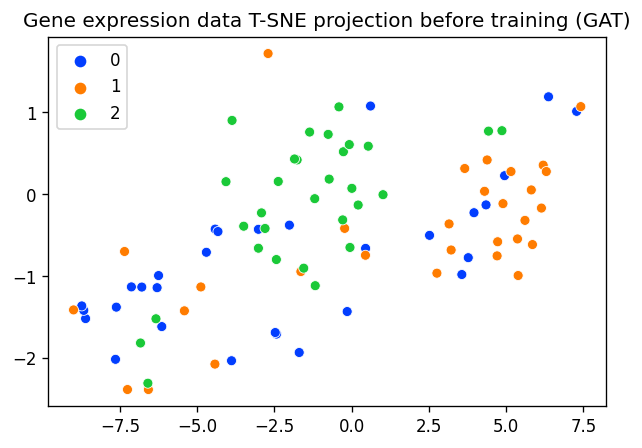

In [ ]:
model = Myconv()
h = model(Data["x"], Data["edge_index"])

print(f'Embedding shape: {list(h.shape)}')
visualize(h)

In [ ]:
model = Myconv()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001) # Define optimizer, an object for updating parameters
#loss = loss + weight decay parameter * L2 norm of the weights, 1) To prevent overfitting 2) To keep the weights small and avoid exploding gradient

def train(Data):
    model.train()
    optimizer.zero_grad()  # Clear gradients.
    out= model(Data["x"], Data["edge_index"])
    train_loss = criterion(out[Data["train_mask"]], Data["y"][Data["train_mask"]])  # Compute the loss solely based on the training nodes.
    train_loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return train_loss


def val(Data):
      model.eval()
      with torch.no_grad():
        out= model(Data["x"], Data["edge_index"])
        val_loss = criterion(out[Data["val_mask"]], Data["y"][Data["val_mask"]])
        return val_loss

In [ ]:
train_loss_ = []
val_loss_ = []

for epoch in range(1, 81):

  epoch_train_loss= []
  epoch_val_loss= []
  train_loss = train(Data)
  val_loss = val(Data)






  epoch_train_loss.append(train_loss.item())
  epoch_val_loss.append(val_loss.item())






  val_loss_.append(sum(epoch_val_loss)/len(epoch_val_loss))
  train_loss_.append(sum(epoch_train_loss)/len(epoch_train_loss))
  print(epoch,'Train Loss: %.3f | val Loss: %.3f'%( train_loss,val_loss))

1 Train Loss: 1.294 | val Loss: 1.288
2 Train Loss: 1.289 | val Loss: 1.283
3 Train Loss: 1.283 | val Loss: 1.277
4 Train Loss: 1.277 | val Loss: 1.272
5 Train Loss: 1.271 | val Loss: 1.266
6 Train Loss: 1.265 | val Loss: 1.260
7 Train Loss: 1.259 | val Loss: 1.254
8 Train Loss: 1.253 | val Loss: 1.248
9 Train Loss: 1.247 | val Loss: 1.242
10 Train Loss: 1.240 | val Loss: 1.236
11 Train Loss: 1.234 | val Loss: 1.230
12 Train Loss: 1.228 | val Loss: 1.224
13 Train Loss: 1.221 | val Loss: 1.218
14 Train Loss: 1.215 | val Loss: 1.212
15 Train Loss: 1.209 | val Loss: 1.206
16 Train Loss: 1.203 | val Loss: 1.200
17 Train Loss: 1.197 | val Loss: 1.194
18 Train Loss: 1.191 | val Loss: 1.189
19 Train Loss: 1.185 | val Loss: 1.183
20 Train Loss: 1.179 | val Loss: 1.178
21 Train Loss: 1.174 | val Loss: 1.173
22 Train Loss: 1.168 | val Loss: 1.168
23 Train Loss: 1.163 | val Loss: 1.163
24 Train Loss: 1.159 | val Loss: 1.159
25 Train Loss: 1.154 | val Loss: 1.154
26 Train Loss: 1.150 | val Loss: 1

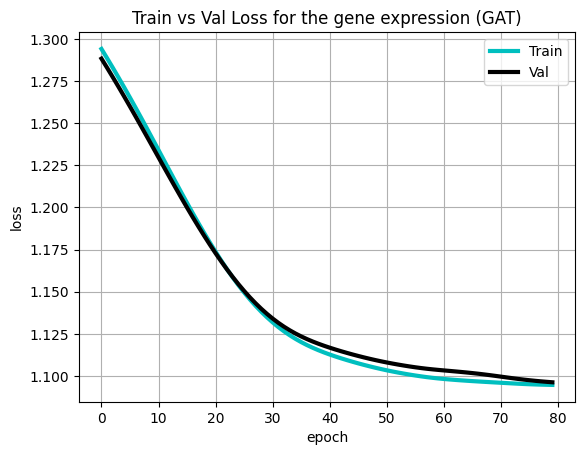

In [ ]:
plt.plot(train_loss_, "c", linewidth = 3)
plt.plot(val_loss_, "k", linewidth = 3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.title('Train vs Val Loss for the gene expression (GAT)')
plt.grid()
plt.show()

In [ ]:
def valid(Data):
      model.eval()
      with torch.no_grad():
        out = model(Data["x"], Data["edge_index"])
        pred = out.argmax(dim=1)
        test_correct = pred[Data["val_mask"]] == Data["y"][Data["val_mask"]]  # Check against ground-truth labels.
        valid_acc = int(test_correct.sum()) / int(Data["val_mask"].sum())  # Derive ratio of correct predictions.
        return valid_acc

In [ ]:
valid_acc = valid(Data)
print(f'Valid Accuracy: {100*valid_acc:.2f}')

Valid Accuracy: 50.00


In [ ]:
def test(Data):
      model.eval()
      with torch.no_grad():
        out= model(Data["x"], Data["edge_index"])
        pred = out.argmax(dim=1)
        test_correct = pred[Data["test_mask"]] == Data["y"][Data["test_mask"]]  # Check against ground-truth labels.
        test_acc = int(test_correct.sum()) / int(Data["test_mask"].sum())  # Derive ratio of correct predictions.
        return test_acc

In [ ]:
test_acc = test(Data)
print(f'Test Accuracy: {100*test_acc:.2f}')

Test Accuracy: 50.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

def visualize(h):
    z = TSNE(n_components = 2, random_state = 0).fit_transform(h.detach().numpy())
    plt.figure(figsize = (6,4),  dpi = 120)
    sns.scatterplot(x = z[:, 0], y = z[:, 1], hue = Data["y"], palette=sns.color_palette("bright",3)).set(title = "Gene expression data T-SNE projection after training (GAT)")

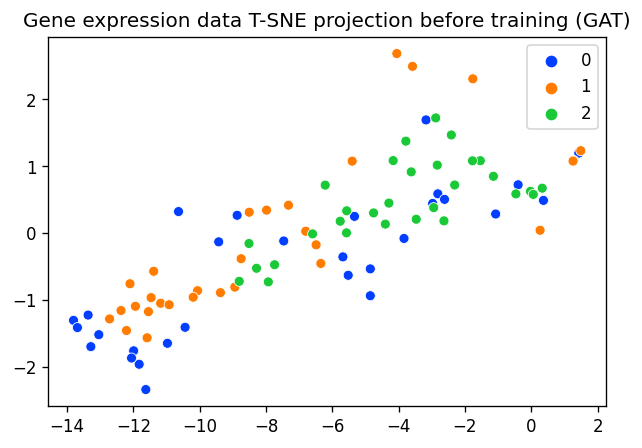

In [ ]:
model.eval()
out = model(Data["x"], Data["edge_index"])
visualize(out)

In [ ]:
pred_t = out.argmax(dim=1)
pred_t

tensor([0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
        2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
        2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
        0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
Data["y"]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

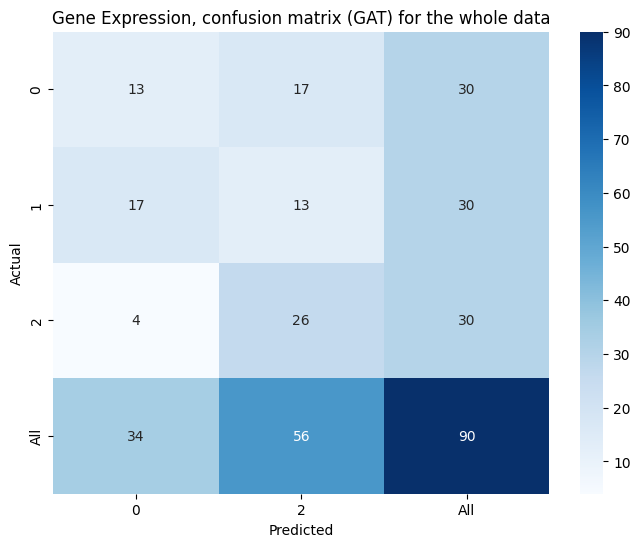

In [ ]:
import seaborn as sn
confusion_matrix = pd.crosstab(Data['y'], pred_t, rownames=['Actual'], colnames = ['Predicted'], margins = True)
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix, annot=True,  cmap="Blues", fmt='g')
plt.title('Gene Expression, confusion matrix (GAT) for the whole data')
plt.show()

In [ ]:
pred = pred_t[Data["test_mask"]]

In [ ]:
act = Data["y"][Data["test_mask"]]

In [ ]:
data = {'y_Actual':    act,
        'y_Predicted':pred
        }

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])
df

,y_Actual,y_Predicted
0,0,0
1,0,2
2,1,2
3,1,2
4,2,2
5,2,2


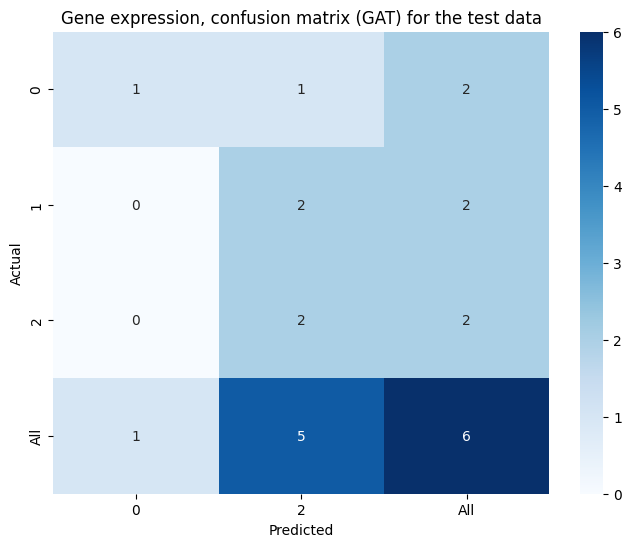

In [ ]:
import seaborn as sn
confusion_matrix = pd.crosstab(act, pred, rownames=['Actual'], colnames = ['Predicted'], margins = True)
plt.figure(figsize=(8, 6))
sn.heatmap(confusion_matrix, annot=True,  cmap="Blues", fmt='g')
plt.title('Gene expression, confusion matrix (GAT) for the test data')
plt.show()